In [370]:
import numpy as np
import pandas as pd
import seaborn as sb

import matplotlib.pyplot as plt
%matplotlib inline 

In [371]:
import io
import requests
from io import StringIO

In [372]:
df=pd.read_csv(r"C:\Users\user\Downloads\archive.zip")

In [373]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [374]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [375]:
df.shape

(1000, 8)

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 43.0+ KB


In [377]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [378]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [379]:
df.duplicated().sum()

0

In [380]:
df.drop_duplicates(subset=None, keep='first', inplace=False)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [381]:
df.gender

0      female
1      female
2      female
3        male
4        male
        ...  
995    female
996      male
997    female
998    female
999    female
Name: gender, Length: 1000, dtype: object

In [382]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [383]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [384]:
df.rename(columns={'race/ethnicity':'ethnicity','parental level of education':'parents_education'},inplace=True);
df.rename(columns=lambda x:x.strip().replace(' ','_'),inplace=True)

In [385]:
df.columns

Index(['gender', 'ethnicity', 'parents_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

### Removing Irrelevant Columns

In [386]:
to_remove = ['lunch',
            'parents_education',
            'test_preparation_course']

In [387]:
df.drop(to_remove, inplace=True, axis=1)

In [388]:
df.head()

,gender,ethnicity,math_score,reading_score,writing_score
0,female,group B,72,72,74
1,female,group C,69,90,88
2,female,group B,90,95,93
3,male,group A,47,57,44
4,male,group C,76,78,75


In [389]:
df.dtypes.value_counts()

int64     3
object    2
dtype: int64

In [390]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [391]:
df['ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: ethnicity, dtype: int64

In [392]:
df['math_score'].value_counts()

65    36
62    35
59    32
69    32
73    27
      ..
22     1
19     1
18     1
8      1
0      1
Name: math_score, Length: 81, dtype: int64

In [393]:
maths=df.math_score.sample(20)

In [394]:
maths.value_counts()

73    2
76    2
95    1
48    1
83    1
58    1
75    1
44    1
78    1
81    1
72    1
51    1
52    1
55    1
24    1
90    1
91    1
67    1
Name: math_score, dtype: int64

In [395]:
df['reading_score'].value_counts()

72    34
74    33
64    32
73    30
67    30
      ..
32     1
28     1
26     1
23     1
17     1
Name: reading_score, Length: 72, dtype: int64

In [400]:
readings=df.reading_score.sample(20)

In [401]:
readings.value_counts()

90    2
70    2
73    2
62    1
78    1
34    1
68    1
69    1
75    1
81    1
60    1
82    1
84    1
55    1
88    1
59    1
64    1
Name: reading_score, dtype: int64

In [396]:
df['writing_score'].value_counts()

74    35
70    33
68    31
73    28
62    27
      ..
23     1
22     1
19     1
15     1
10     1
Name: writing_score, Length: 77, dtype: int64

In [402]:
writings=df.writing_score.sample(20)

In [403]:
writings.value_counts()

66     2
100    2
74     2
43     1
69     1
38     1
39     1
72     1
95     1
75     1
81     1
83     1
86     1
55     1
89     1
58     1
76     1
Name: writing_score, dtype: int64

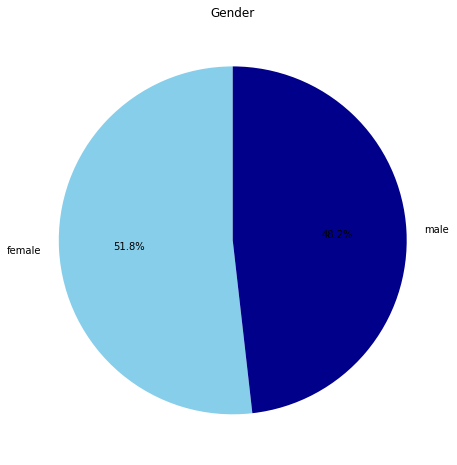

In [397]:
labels=df['gender'].value_counts().index
values=df['gender'].value_counts().values
colors = ["skyblue", "darkblue"]
plt.figure(figsize=(10,8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Gender')
plt.show()

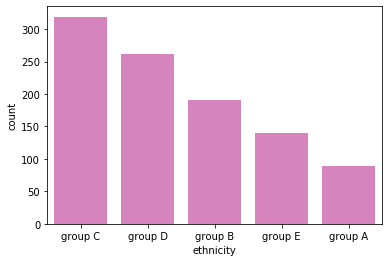

In [398]:
base_color=sb.color_palette()[6]
freq=df['ethnicity'].value_counts()
gen_order=freq.index
sb.countplot(data=df,x='ethnicity',color=base_color,order=gen_order);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

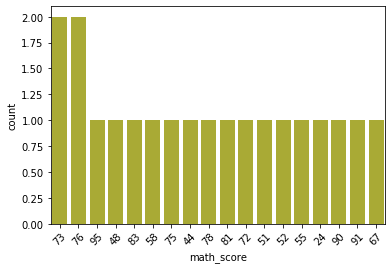

In [417]:
base_color=sb.color_palette()[8]
freq=maths.value_counts()
gen_order=freq.index
sb.countplot(data=df,x=maths,color=base_color,order=gen_order)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

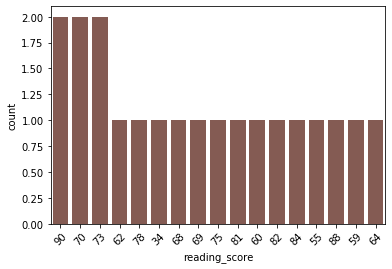

In [416]:
base_color=sb.color_palette()[5]
freq=readings.value_counts()
gen_order=freq.index
sb.countplot(data=df,x=readings,color=base_color,order=gen_order)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

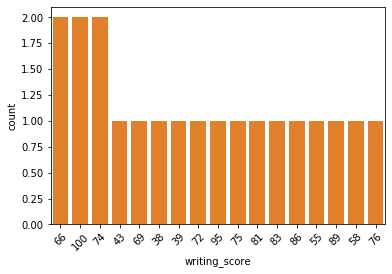

In [415]:
base_color=sb.color_palette()[1]
freq=writings.value_counts()
gen_order=freq.index
sb.countplot(data=df,x=writings,color=base_color,order=gen_order)
plt.xticks(rotation=45)